In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [5]:
# Read in data into a dataframe 
data = pd.read_csv('6_class_bbbp.csv', sep=';')
# Display top of dataframe
data.head()

,SMILES,p_np_class
0,[Cl].CC(C)NCC(O)COC1=C2C=CC=CC2=CC=C1,yes
1,CC(C)(C)OC(=O)CCCC1=CC=C(C=C1)N(CCCl)CCCl,yes
2,CC1COC2=C(N3CCN(C)CC3)C(F)=CC3=C2N1C=C(C(O)=O)...,yes
3,CC(=O)NCCCOC1=CC(CN2CCCCC2)=CC=C1,yes
4,CC1=C(C(=O)N[C@H]2[C@H]3SC(C)(C)[C@@H](N3C2=O)...,yes


In [6]:
data1 = pd.read_csv('desc.csv')
# Display top of dataframe
data1.head()

,SMILES,CASRN,EXTERNALID,N,NAME,NAME.1,ARTICLEID,PUBMEDID,PAGE,TABLE,...,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,[Cl].CC(C)NCC(O)COC1=C2C=CC=CC2=CC=C1,-,-,-,-,-,-,-,-,-,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,CC(C)(C)OC(=O)CCCC1=CC=C(C=C1)N(CCCl)CCCl,-,-,-,-,-,-,-,-,-,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,CC1COC2=C(N3CCN(C)CC3)C(F)=CC3=C2N1C=C(C(O)=O)...,-,-,-,-,-,-,-,-,-,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
3,CC(=O)NCCCOC1=CC(CN2CCCCC2)=CC=C1,-,-,-,-,-,-,-,-,-,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,CC1=C(C(=O)N[C@H]2[C@H]3SC(C)(C)[C@@H](N3C2=O)...,-,-,-,-,-,-,-,-,-,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [7]:
X=data1.drop(columns =['SMILES','CASRN','EXTERNALID','N','NAME.1','ARTICLEID','PUBMEDID','PAGE','NAME','TABLE','ERROR'])
X

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,259.4,6.484,23.72,39.59,25.53,45.07,0.593,0.990,0.638,1.127,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,360.4,7.207,29.48,49.77,32.29,56.62,0.590,0.995,0.646,1.132,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,361.4,7.857,29.05,47.08,29.62,52.41,0.631,1.023,0.644,1.139,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
3,290.5,6.180,26.79,46.46,29.06,53.40,0.570,0.989,0.618,1.136,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,435.9,9.275,31.87,48.41,32.89,52.73,0.678,1.030,0.700,1.122,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,276.0,13.800,16.10,22.15,15.31,22.64,0.805,1.107,0.766,1.132,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1988,399.5,7.990,30.37,51.33,31.43,57.49,0.607,1.027,0.629,1.150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,323.4,7.521,27.47,43.19,28.64,48.53,0.639,1.004,0.666,1.129,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1990,382.5,7.083,33.22,54.12,34.97,60.82,0.615,1.002,0.648,1.126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
y = data['p_np_class'].astype('category').cat.codes
y

0       1
1       1
2       1
3       1
4       1
       ..
1987    1
1988    1
1989    1
1990    1
1991    1
Length: 1992, dtype: int8

In [9]:
def getFeature(mask):
    new_features = [] # The list of your K best features

    for bool, feature in zip(mask, X.columns):
        if bool:
            new_features.append(feature)
            
    return new_features

In [10]:
def myModel(myX,myY,X_test):
    # instantiate the model (using the default parameters)
    logreg = LogisticRegression()

    # fit the model with data
    logreg.fit(myX,myY)

    # get predict
    y_pred=logreg.predict(X_test)
    
    return y_pred
   

### 1. Chi-square

In [11]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=6)
chi_selector.fit(X_norm, y)
chi_features = getFeature(chi_selector.get_support())
chi_features

['B04[O-S]', 'B05[O-S]', 'B08[N-O]', 'B08[O-O]', 'B09[N-O]', 'Ro5']

In [12]:
X_chi = X[chi_features]
X_chi

,B04[O-S],B05[O-S],B08[N-O],B08[O-O],B09[N-O],Ro5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
1987,0.0,0.0,0.0,0.0,0.0,0.0
1988,1.0,1.0,1.0,1.0,1.0,1.0
1989,0.0,0.0,0.0,0.0,0.0,0.0
1990,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
from sklearn.model_selection import train_test_split
# import the class
from sklearn.linear_model import LogisticRegression

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X_chi,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
chi_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8313253012048193
Precision: 0.8595641646489104
Recall: 0.931758530183727


### 2. Mutual Information

In [15]:
from sklearn.feature_selection import mutual_info_classif
mi_selector = SelectKBest(mutual_info_classif, k=6)
mi_selector.fit(X, y)
mi_feature = getFeature(mi_selector.get_support())
mi_feature

['P_VSA_m_3', 'P_VSA_v_2', 'P_VSA_p_2', 'P_VSA_ppp_A', 'TPSA(NO)', 'TPSA(Tot)']

In [16]:
X_mi = X[mi_feature]
X_train,X_test,y_train,y_test=train_test_split(X_mi,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
mi_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8293172690763052
Precision: 0.854066985645933
Recall: 0.937007874015748


### 3. Anova F-value

In [17]:
#3 Anova F-value
from sklearn.feature_selection import f_classif
anov_selector = SelectKBest(f_classif, k=6)
anov_selector.fit(X, y)
anova_feature = getFeature(anov_selector.get_support())
anova_feature

C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  45  376 1627 ... 3635 3636 3637] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


['P_VSA_v_2', 'P_VSA_p_2', 'P_VSA_ppp_A', 'TPSA(NO)', 'TPSA(Tot)', 'SAacc']

In [18]:
X_anova = X[anova_feature]
X_train,X_test,y_train,y_test=train_test_split(X_anova,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
anova_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8393574297188755
Precision: 0.864406779661017
Recall: 0.937007874015748


### 4. Variance Threshold

In [19]:
#4 Variance Threshold
from sklearn.feature_selection import VarianceThreshold
var_selector = VarianceThreshold(threshold=1)
var_selector.fit_transform(X)
var_feature = getFeature(var_selector.get_support())
len(var_feature)

952

In [20]:
X_thresh = X[var_feature]
X_train,X_test,y_train,y_test=train_test_split(X_thresh,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
thresh_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8273092369477911
Precision: 0.8454332552693209
Recall: 0.94750656167979


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 5. Fisher Score

In [21]:
#5. Fisher Score
from skfeature.function.similarity_based import fisher_score
score = fisher_score.fisher_score(X.to_numpy(), y.to_numpy())
X.columns[score[:6]]

Index(['nCsp3', 'B05[Cl-B]', 'nCsp2', 'B05[I-Si]', 'nX', 'B05[P-F]'], dtype='object')

In [22]:
X_fisher = X[X.columns[score[:6]]]
X_train,X_test,y_train,y_test=train_test_split(X_fisher,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
fisher_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7811244979919679
Precision: 0.779835390946502
Recall: 0.994750656167979


### 6. MultiSURF

In [23]:
#6. MultiSURF
from skrebate import MultiSURF
fs = MultiSURF(n_jobs=-1, n_features_to_select=X.columns)
fs.fit(X.values, y.values)
fs

MultiSURF(n_features_to_select=Index(['MW', 'AMW', 'Sv', 'Se', 'Sp', 'Si', 'Mv', 'Me', 'Mp', 'Mi',
       ...
       'Psychotic-80', 'Psychotic-50', 'Hypertens-80', 'Hypertens-50',
       'Hypnotic-80', 'Hypnotic-50', 'Neoplastic-80', 'Neoplastic-50',
       'Infective-80', 'Infective-50'],
      dtype='object', length=3686),
          n_jobs=-1)

In [24]:
X_multi = X[X.columns]
X_train,X_test,y_train,y_test=train_test_split(X_multi,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
multi_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8232931726907631
Precision: 0.8447058823529412
Recall: 0.9422572178477691


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 7. Recursive Feature Elimination

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), 
                   n_features_to_select=6, step=1, verbose=-1)
rfe_selector.fit(X_norm, y)
rfe_feature = getFeature(rfe_selector.get_support())
rfe_feature

['MAC3(IP)', 'MAC4(Ap)', 'MAC5(Mw)', 'MAC5(IP)', 'MAC5(Ap)', 'MAC7(At)']

In [22]:
X_rec = X[rfe_feature]
X_train,X_test,y_train,y_test=train_test_split(X_rec,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
rec_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.92
Precision: 0.8888888888888888
Recall: 0.8888888888888888


### 8. Permutation Importance

In [23]:
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
perm = PermutationImportance(LogisticRegression(solver='lbfgs', max_iter=10000), random_state=42, cv=10)
perm.fit(X, y)
perm_selector = SelectFromModel(perm,max_features=6).fit(X, y)
perm_feature = getFeature(perm_selector.get_support())
perm_feature

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


['MAC3(At)', 'MAC3(Ap)', 'MAC4(Ap)', 'MAC5(At)', 'MAC7(Mw)', 'MAC7(Vm)']

In [24]:
X_perm = X[perm_feature]
X_train,X_test,y_train,y_test=train_test_split(X_perm,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
perm_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.84
Precision: 0.8571428571428571
Recall: 0.6666666666666666


### 9. SHAP

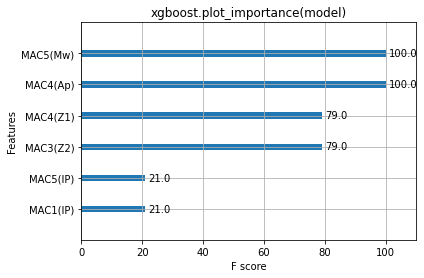

In [25]:
import shap
import xgboost
import matplotlib.pylab as pl
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

In [26]:
X_shap = X[['MAC5(Mw)', 'MAC4(Ap)', 'MAC4(Z1)', 'MAC3(Z2)', 'MAC5(IP)', 'MAC1(IP)']]
X_train,X_test,y_train,y_test=train_test_split(X_shap,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
shap_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.92
Precision: 0.8888888888888888
Recall: 0.8888888888888888


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### 10. Boruta

In [27]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=6)
boru_selector = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=1)
boru_selector.fit(X.values, y.values)

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=6,
                                          n_estimators=145, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x224FD92B840),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x224FD92B840)

In [28]:
accept = X.columns[boru_selector.support_].to_list()
#accept

In [29]:
X_boruta = X[accept]
X_train,X_test,y_train,y_test=train_test_split(X_boruta,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
boruta_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.88
Precision: 0.8
Recall: 0.8888888888888888


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### 11. Embedded Random Forest

In [30]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), max_features=6)
embeded_rf_selector.fit(X, y)
embeded_rf_feature = getFeature(embeded_rf_selector.get_support())
embeded_rf_feature

['MAC3(Ap)', 'MAC4(Ap)', 'MAC5(Mw)', 'MAC5(At)', 'MAC6(Ap)', 'MAC7(At)']

In [31]:
X_rf = X[embeded_rf_feature]
X_train,X_test,y_train,y_test=train_test_split(X_rf,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
rf_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8
Precision: 0.75
Recall: 0.6666666666666666


### 12. Embedded LightGBM

In [32]:
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectFromModel
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05,
                    num_leaves=32, colsample_bytree=0.2,                                           
                    reg_alpha=3, reg_lambda=1, min_split_gain=0.01,    
                    min_child_weight=40)
embeded_lgb_selector = SelectFromModel(lgbc, max_features=6)
embeded_lgb_selector.fit(X, y)
embeded_lgb_feature = getFeature(embeded_lgb_selector.get_support())
embeded_lgb_feature

['MAC1(Mw)', 'MAC1(HP)', 'MAC1(IP)', 'MAC1(ECI)', 'MAC1(Vm)', 'MAC1(Anp)']

In [33]:
X_lgbm = X[embeded_lgb_feature]
X_train,X_test,y_train,y_test=train_test_split(X_lgbm,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
lgbm_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.72
Precision: 0.625
Recall: 0.5555555555555556


In [34]:
chi_table = ['Chi-square', chi_acc, 'MAC3(Ap)', 'MAC4(ECI)', 'MAC4(Ap)', 'MAC5(Ap)', 'MAC6(Ap)', 'MAC7(Ap)' ]
mi_table = ['Mutual Information', mi_acc, 'MAC4(Ap)', 'MAC5(Mw)', 'MAC5(At)', 'MAC5(Ap)', 'MAC6(Mw)', 'MAC6(Ap)']
anova_table = ['Anova F-value', anova_acc, 'MAC4(IP)', 'MAC4(Ap)', 'MAC5(IP)', 'MAC5(At)', 'MAC5(Ap)', 'MAC7(Ap)']
var_table = ['Variance Threshold',thresh_acc,'-','-','-','-','-','-']
fisher_table = ['Fisher Score', fisher_acc, 'MAC4(ECI)', 'MAC3(Pa)', 'MAC3(ECI)', 'MAC3(Vm)', 'MAC1(ECI)','MAC4(Pa)']
multi_table = ['MultiSURF',multi_acc,'-','-','-','-','-','-']
rec_table = ['Recursive Feature Elimination',rec_acc, 'MAC3(IP)', 'MAC4(Ap)', 'MAC5(Mw)', 'MAC5(IP)', 'MAC5(Ap)', 'MAC7(At)']
perm_table = ['Permutation Importance',perm_acc,'MAC3(At)', 'MAC3(Ap)', 'MAC4(Ap)', 'MAC5(At)', 'MAC7(Mw)', 'MAC7(Vm)']
shap_table = ['SHAP', shap_acc, 'MAC5(Mw)', 'MAC4(Ap)', 'MAC4(Z1)', 'MAC3(Z2)', 'MAC5(IP)', 'MAC1(IP)']
boruta_table = ['Boruta',boruta_acc,'-','-','-','-','-','-']
rf_table = ['Embedded Random Forest', rf_acc,'MAC3(Ap)', 'MAC4(Ap)', 'MAC5(Mw)', 'MAC5(At)', 'MAC6(Ap)', 'MAC7(At)']
lgbm_table =['Embedded LightGBM', lgbm_acc, 'MAC1(Mw)', 'MAC1(HP)', 'MAC1(IP)', 'MAC1(ECI)', 'MAC1(Vm)', 'MAC1(Anp)']




In [35]:
myTable = [chi_table, mi_table, anova_table,var_table, fisher_table, multi_table, rec_table, perm_table, shap_table,
          boruta_table, rf_table, lgbm_table]




In [36]:
results = pd.DataFrame(myTable,columns=['Method', 'Accuracy','Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6'])

results                    

,Method,Accuracy,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,Chi-square,0.88,MAC3(Ap),MAC4(ECI),MAC4(Ap),MAC5(Ap),MAC6(Ap),MAC7(Ap)
1,Mutual Information,0.76,MAC4(Ap),MAC5(Mw),MAC5(At),MAC5(Ap),MAC6(Mw),MAC6(Ap)
2,Anova F-value,0.80,MAC4(IP),MAC4(Ap),MAC5(IP),MAC5(At),MAC5(Ap),MAC7(Ap)
3,Variance Threshold,0.72,-,-,-,-,-,-
4,Fisher Score,0.64,MAC4(ECI),MAC3(Pa),MAC3(ECI),MAC3(Vm),MAC1(ECI),MAC4(Pa)
5,MultiSURF,0.72,-,-,-,-,-,-
6,Recursive Feature Elimination,0.92,MAC3(IP),MAC4(Ap),MAC5(Mw),MAC5(IP),MAC5(Ap),MAC7(At)
7,Permutation Importance,0.84,MAC3(At),MAC3(Ap),MAC4(Ap),MAC5(At),MAC7(Mw),MAC7(Vm)
8,SHAP,0.92,MAC5(Mw),MAC4(Ap),MAC4(Z1),MAC3(Z2),MAC5(IP),MAC1(IP)
9,Boruta,0.88,-,-,-,-,-,-


In [26]:
results.to_csv('result.csv')

In [27]:
results.to_excel("result.xlsx", sheet_name='Sheet_name_1') 

In [15]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25,random_state=0)

model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val)

-7.3755193267135635

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

    # fit the model with data
logreg.fit(X_train,y_train)

    # get predict
y_pred=logreg.predict(X_val)
pp_im = metrics.accuracy_score(y_val, y_pred)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.72


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{data.columns[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")


MAC7(Z1)1165.723 +/- 206.355
MAC2(Z1)619.053 +/- 125.856
MAC7(Mw)445.093 +/- 78.788
MAC3(Z1)325.653 +/- 65.469
MAC1(Mw)325.040 +/- 68.574
MAC5(Mw)301.063 +/- 54.619
MAC2(Mw)288.199 +/- 53.579
MAC4(Z1)218.922 +/- 42.216
MAC6(Z1)200.863 +/- 33.593
MAC6(HP)147.973 +/- 29.946
MAC3(Ap)146.277 +/- 31.166
MAC3(HP)138.040 +/- 28.945
MAC2(HP)134.440 +/- 25.928
MAC4(HP)120.941 +/- 26.972
MAC2(Anp)68.624 +/- 15.016
MAC1(Z1)64.465 +/- 14.540
ID      42.625 +/- 9.762
MAC6(Ap)41.045 +/- 8.018
MAC2(Pb)35.842 +/- 8.133
MAC1(Ap)32.609 +/- 7.728
MAC5(Ap)32.016 +/- 7.120
MAC5(HP)29.192 +/- 7.033
MAC1(Pb)26.298 +/- 5.917
MAC3(Z2)25.562 +/- 7.107
MAC3(Pb)24.707 +/- 5.793
MAC3(Mw)23.074 +/- 5.522
MAC4(Anp)21.567 +/- 5.498
MAC4(Mw)20.694 +/- 4.832
MAC5(Pb)16.975 +/- 4.504
MAC6(Anp)15.981 +/- 4.661
MAC4(Z2)11.866 +/- 3.682
MAC5(Z1)11.369 +/- 3.312
MAC4(Ap)10.522 +/- 2.862
MAC1(Anp)7.779 +/- 2.848
MAC7(HP)6.746 +/- 2.626
MAC5(Z2)4.108 +/- 1.423
MAC3(IP)3.876 +/- 1.552
MAC2(Z2)2.550 +/- 0.830
MAC7(Z2)2.537 +/- 

In [18]:
X_perm1 = X[['MAC7(Z1)','MAC2(Z1)', 'MAC7(Mw)', 'MAC3(Z1)', 'MAC1(Mw)', 'MAC5(Mw)']]
X_train,X_test,y_train,y_test=train_test_split(X_perm1,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()

    # fit the model with data
logreg.fit(X_train,y_train)

    # get predict
y_pred=logreg.predict(X_test)
perm_acc = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.64
Precision: 0.5
Recall: 0.3333333333333333
